# XOR 게이트 구현해보기<br>
0, 0 -> 0<br>
1, 0 -> 1<br>
0, 1 -> 1<br>
1, 1 -> 1

# 데이터 준비하기

In [15]:
import numpy as np
import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

In [8]:
#데이터 준비하기
data = np.array([[0,0], [1,0], [0,1], [1,1]]) # XOR 연산 학습 데이터
# label = np.array([[0], [1], [1], [1]])      # 정답
label = np.array([[0], [1], [1], [0]])        # 정답 XOR

# 모델 구성하기

In [9]:
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu')) # 다층 퍼셉트론을 구성
# 중간에 있는 활성 함수는 relu를 사용
model.add(Dense(1, activation='sigmoid'))


# 모델 설정하기

In [17]:
#model.compile(optimizer=SGD(), loss=mse, metrics=['acc'])
model.compile(optimizer=RMSprop(), loss=mse, metrics=['acc'])
# SGD: 조금만 보고 빨리 판단함
# RMSProp: 

# 모델 확인하기

In [11]:
# 모델 확인하기
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


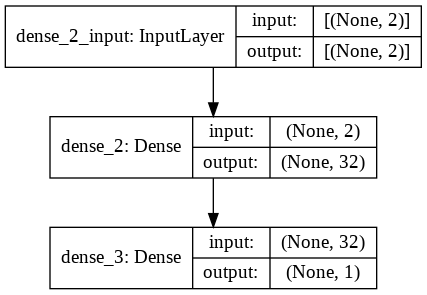

In [12]:
tf.keras.utils.plot_model(model,
                          show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


# 2명아 데이터 32개 들어왔다 데이터 분석하고 보고해서 다음 한 명한테 줘 

# 모델 학습시키기

In [13]:
history = model.fit(data, label, epochs=1000) # 학습 데이터, 정답, 공부 횟수
# 문제집(data) 주고 정답지(label) 공부 40번 시킴

Epoch 1/1000
1/1 [==============================] - 1s 789ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2644 - acc: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2643 - acc: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2642 - acc: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2640 - acc: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2639 - acc: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2638 - acc: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2637 - acc: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2635 - acc: 0.2500
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2634 - acc: 0.2500
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step -

# 학습 결과 그려보기

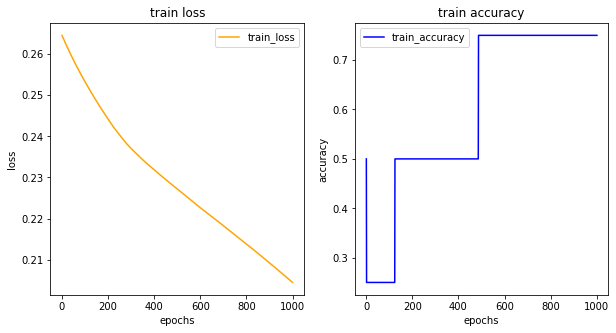

In [18]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 모델 가중치 확인

In [ ]:
model.get_weights()

[array([[ 0.71852523],
        [-0.4731414 ]], dtype=float32), array([0.40753067], dtype=float32)]

# 모델 예측하기

In [ ]:
result = model.predict_classes(data)
print(result)

[[0]
 [1]
 [0]
 [1]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# 옵티마이저 : 산악 길잡이 => 똑같은 모델인데 옵티마이저만 수정해보면 값을 더 빨리 찾을 수도 있음